# EDA

### libraries

In [5]:
import pandas as pd

### helper functions

In [6]:
def load_csv(path):
    return pd.read_csv(path)

### data

In [7]:
simple = load_csv('../data/simple.csv')
full = load_csv('../data/full.csv')

In [8]:
print(f"Simple dataset lenght {len(simple)}. Full dataset lenght {len(full)}")

Simple dataset lenght 9699. Full dataset lenght 13551


In [9]:
simple.head()

,transcript_id,mi_quality,video_title,video_url,topic,utterance_id,interlocutor,timestamp,utterance_text,main_therapist_behaviour,client_talk_type
0,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,0,therapist,00:00:13,Thanks for filling it out. We give this form t...,question,NaN
1,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,1,client,00:00:24,Sure.,NaN,neutral
2,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,2,therapist,00:00:25,"So, let's see. It looks that you put-- You dri...",therapist_input,NaN
3,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,3,client,00:00:34,Mm-hmm.,NaN,neutral
4,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,4,therapist,00:00:34,-and you usually have three to four drinks whe...,therapist_input,NaN


In [10]:
full[['interlocutor','utterance_text','main_therapist_behaviour']].head(20)

,interlocutor,utterance_text,main_therapist_behaviour
0,therapist,Thanks for filling it out. We give this form t...,question
1,client,Sure.,NaN
2,therapist,"So, let's see. It looks that you put-- You dri...",therapist_input
3,client,Mm-hmm.,NaN
4,therapist,-and you usually have three to four drinks whe...,therapist_input
5,client,Usually three drinks and glasses of wine.,NaN
6,therapist,Okay. That's at least 12 drinks a week.,therapist_input
7,client,Something like that.,NaN
8,therapist,"Okay. Just so you know, my role, um, when we t...",therapist_input
9,client,Okay.,NaN


<Axes: xlabel='main_therapist_behaviour'>

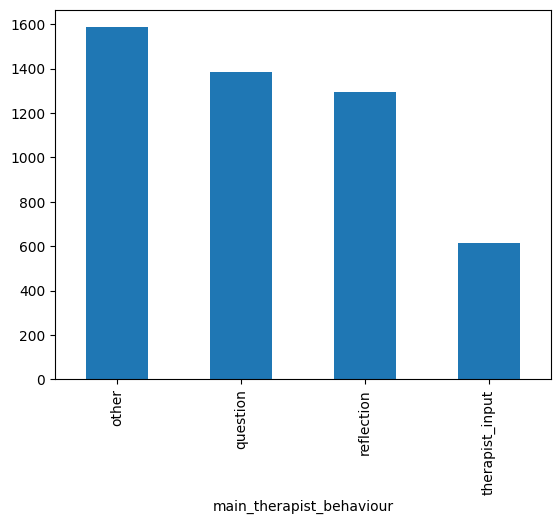

In [11]:
simple['main_therapist_behaviour'].value_counts().plot(kind='bar')

<Axes: xlabel='main_therapist_behaviour'>

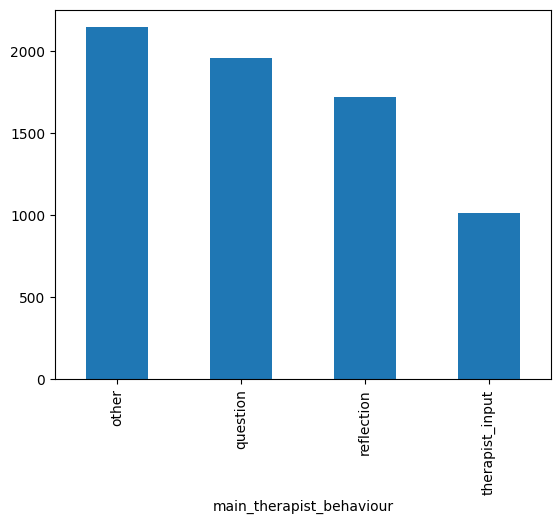

In [12]:
full['main_therapist_behaviour'].value_counts().plot(kind='bar')

In [13]:
simple.columns

Index(['transcript_id', 'mi_quality', 'video_title', 'video_url', 'topic',
       'utterance_id', 'interlocutor', 'timestamp', 'utterance_text',
       'main_therapist_behaviour', 'client_talk_type'],
      dtype='object')

In [14]:
full.columns

Index(['mi_quality', 'transcript_id', 'video_title', 'video_url', 'topic',
       'utterance_id', 'interlocutor', 'timestamp', 'utterance_text',
       'annotator_id', 'therapist_input_exists', 'therapist_input_subtype',
       'reflection_exists', 'reflection_subtype', 'question_exists',
       'question_subtype', 'main_therapist_behaviour', 'client_talk_type'],
      dtype='object')

In [15]:
filtered_df = full[full['interlocutor']=='therapist']

In [16]:
filtered_df = filtered_df[['transcript_id','utterance_text','main_therapist_behaviour']]

#### checking for null data

In [17]:
filtered_df.isnull().sum()

transcript_id               0
utterance_text              0
main_therapist_behaviour    0
dtype: int64

#### checking for duplicated data

In [18]:
filtered_df.duplicated().sum()

2546

In [19]:
filtered_df.iloc[6676]

transcript_id                                                             130
utterance_text              Yeah. Well, the good news is he doesn't have p...
main_therapist_behaviour                                      therapist_input
Name: 13256, dtype: object

In [20]:
filtered_df.iloc[6675]

transcript_id                                                             130
utterance_text              Yeah. Well, the good news is he doesn't have p...
main_therapist_behaviour                                      therapist_input
Name: 13255, dtype: object

In [21]:
filtered_df = filtered_df.drop_duplicates(subset=['utterance_text'])

In [22]:
len(filtered_df)

3784